In [ ]:
#Data Processing
import pandas as pd
import numpy as np

#Data Visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats

import os
import datetime

In [ ]:
df = pd.read_csv("trips_data.csv")
df.tail()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
549,458,POOL,COMPLETED,2016-06-22 11:07:02 +0000 UTC,2016-06-22 11:14:17 +0000 UTC,-23.616073,-46.665949,2016-06-22 11:24:28 +0000 UTC,-23.602760,-46.644897,2.20,7.84,BRL
550,458,uberX,COMPLETED,2016-04-07 00:30:46 +0000 UTC,2016-04-07 00:35:23 +0000 UTC,-23.569478,-46.672408,2016-04-07 00:50:14 +0000 UTC,-23.602737,-46.645352,4.08,15.06,BRL
551,458,uberX,COMPLETED,2016-04-06 21:16:52 +0000 UTC,2016-04-06 21:20:44 +0000 UTC,-23.602608,-46.645084,2016-04-06 21:41:30 +0000 UTC,-23.569549,-46.672412,3.45,15.16,BRL
552,458,uberX,CANCELED,2016-04-06 21:12:03 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.601718,-46.646871,1970-01-01 00:00:00 +0000 UTC,-23.600862,-46.644494,0.00,0.00,BRL
553,458,uberX,CANCELED,2015-12-17 23:52:50 +0000 UTC,2015-12-18 00:01:01 +0000 UTC,-23.607114,-46.566483,1970-01-01 00:00:00 +0000 UTC,-23.611577,-46.570618,0.00,7.00,BRL


In [ ]:
df.dtypes

City                      int64
Product Type             object
Trip or Order Status     object
Request Time             object
Begin Trip Time          object
Begin Trip Lat          float64
Begin Trip Lng          float64
Dropoff Time             object
Dropoff Lat             float64
Dropoff Lng             float64
Distance (miles)        float64
Fare Amount             float64
Fare Currency            object
dtype: object

In [ ]:
df.shape

(554, 13)

In [ ]:
df.drop("Fare Currency",axis=1,inplace=True)

In [ ]:
df.columns

Index(['City', 'Product Type', 'Trip or Order Status', 'Request Time',
       'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng', 'Dropoff Time',
       'Dropoff Lat', 'Dropoff Lng', 'Distance (miles)', 'Fare Amount'],
      dtype='object')

In [ ]:
df["Fare Amount"].describe()

count    554.000000
mean      16.280361
std       12.445731
min        0.000000
25%        7.872500
50%       15.100000
75%       24.682500
max       95.400000
Name: Fare Amount, dtype: float64

In [ ]:
df.isnull().sum()

City                     0
Product Type             3
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          29
Begin Trip Lng          29
Dropoff Time             0
Dropoff Lat             29
Dropoff Lng             29
Distance (miles)         0
Fare Amount              0
dtype: int64

In [ ]:
df[df['Product Type'] == False] == True

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount


In [ ]:
df.drop([0,6,173],axis =0,inplace = True)

In [ ]:
df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25


In [ ]:
df.tail()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
549,458,POOL,COMPLETED,2016-06-22 11:07:02 +0000 UTC,2016-06-22 11:14:17 +0000 UTC,-23.616073,-46.665949,2016-06-22 11:24:28 +0000 UTC,-23.602760,-46.644897,2.20,7.84
550,458,uberX,COMPLETED,2016-04-07 00:30:46 +0000 UTC,2016-04-07 00:35:23 +0000 UTC,-23.569478,-46.672408,2016-04-07 00:50:14 +0000 UTC,-23.602737,-46.645352,4.08,15.06
551,458,uberX,COMPLETED,2016-04-06 21:16:52 +0000 UTC,2016-04-06 21:20:44 +0000 UTC,-23.602608,-46.645084,2016-04-06 21:41:30 +0000 UTC,-23.569549,-46.672412,3.45,15.16
552,458,uberX,CANCELED,2016-04-06 21:12:03 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.601718,-46.646871,1970-01-01 00:00:00 +0000 UTC,-23.600862,-46.644494,0.00,0.00
553,458,uberX,CANCELED,2015-12-17 23:52:50 +0000 UTC,2015-12-18 00:01:01 +0000 UTC,-23.607114,-46.566483,1970-01-01 00:00:00 +0000 UTC,-23.611577,-46.570618,0.00,7.00


In [ ]:
#plot showing which product type use how many time

Text(0.5, 1.0, 'Number of Trips per Type')

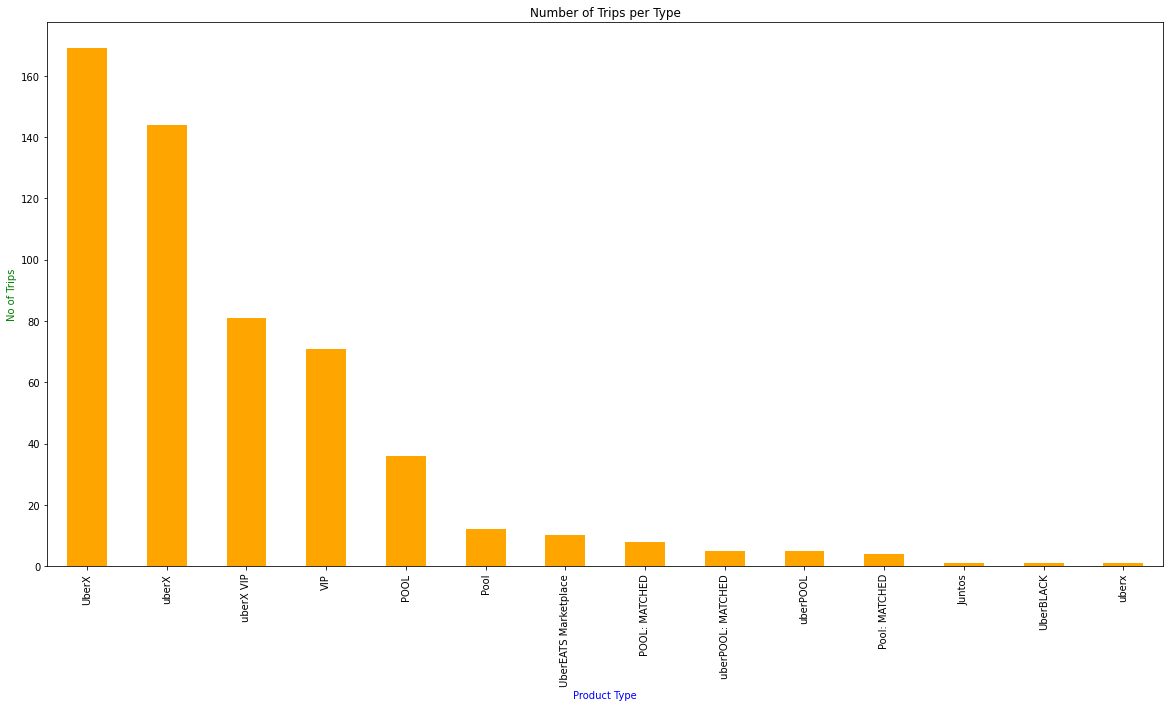

In [ ]:
count = df['Product Type'].value_counts()
x = count.plot(kind='bar',figsize=(20,10), color="Orange")
plt.xlabel('Product Type', color="Blue")
plt.ylabel('No of Trips', color="Green")
plt.title('Number of Trips per Type')

In [ ]:

df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25


In [ ]:
# total fair per month

In [ ]:
df['Date'] = df['Begin Trip Time'].str.split(' ').str[0]
df['Time'] = df['Begin Trip Time'].str.split(' ').str[1]

df['Date_Time'] = df['Date'] +" "+  df['Time']
df['Date_Time']


df['Date_Time'] = pd.to_datetime(df['Date_Time']) 

df['month']=df['Date_Time'].dt.month
df['month']
df

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Date,Time,Date_Time,month
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,2021-01-13,20:27:29,2021-01-13 20:27:29,1
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,2021-01-03,00:33:00,2021-01-03 00:33:00,1
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,2020-12-11,23:27:32,2020-12-11 23:27:32,12
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,2020-12-11,00:46:46,2020-12-11 00:46:46,12
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,2020-12-10,11:46:20,2020-12-10 11:46:20,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,458,POOL,COMPLETED,2016-06-22 11:07:02 +0000 UTC,2016-06-22 11:14:17 +0000 UTC,-23.616073,-46.665949,2016-06-22 11:24:28 +0000 UTC,-23.602760,-46.644897,2.20,7.84,2016-06-22,11:14:17,2016-06-22 11:14:17,6
550,458,uberX,COMPLETED,2016-04-07 00:30:46 +0000 UTC,2016-04-07 00:35:23 +0000 UTC,-23.569478,-46.672408,2016-04-07 00:50:14 +0000 UTC,-23.602737,-46.645352,4.08,15.06,2016-04-07,00:35:23,2016-04-07 00:35:23,4
551,458,uberX,COMPLETED,2016-04-06 21:16:52 +0000 UTC,2016-04-06 21:20:44 +0000 UTC,-23.602608,-46.645084,2016-04-06 21:41:30 +0000 UTC,-23.569549,-46.672412,3.45,15.16,2016-04-06,21:20:44,2016-04-06 21:20:44,4
552,458,uberX,CANCELED,2016-04-06 21:12:03 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.601718,-46.646871,1970-01-01 00:00:00 +0000 UTC,-23.600862,-46.644494,0.00,0.00,1970-01-01,00:00:00,1970-01-01 00:00:00,1


In [ ]:
fig=px.bar(x=df['Distance (miles)'],y=df['Fare Amount'],
      labels={'x':'Distance(miles)','y':'Fare Amount'},)
fig.show()

In [ ]:

#Month vs total no of trips

Text(0.5, 1.0, 'Number Trips per month')

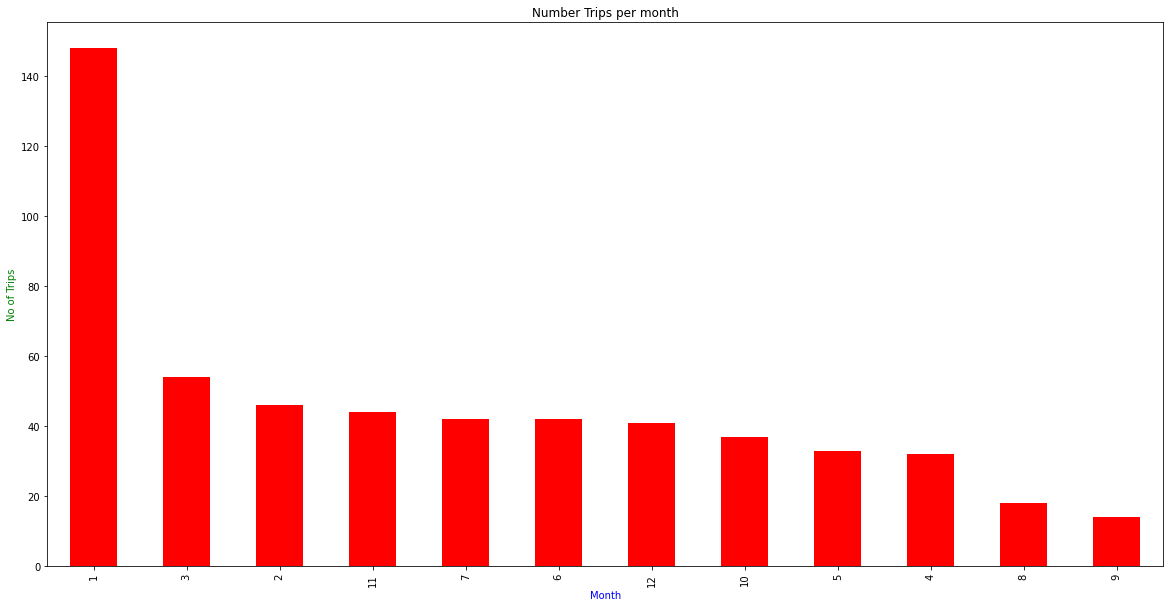

In [ ]:

count = df['month'].value_counts()
x = count.plot(kind='bar',figsize=(20,10), color="Red")
plt.xlabel('Month', color="Blue")
plt.ylabel('No of Trips', color="Green")
plt.title("Number Trips per month")

Text(0.5, 1.0, 'No of trips with status')

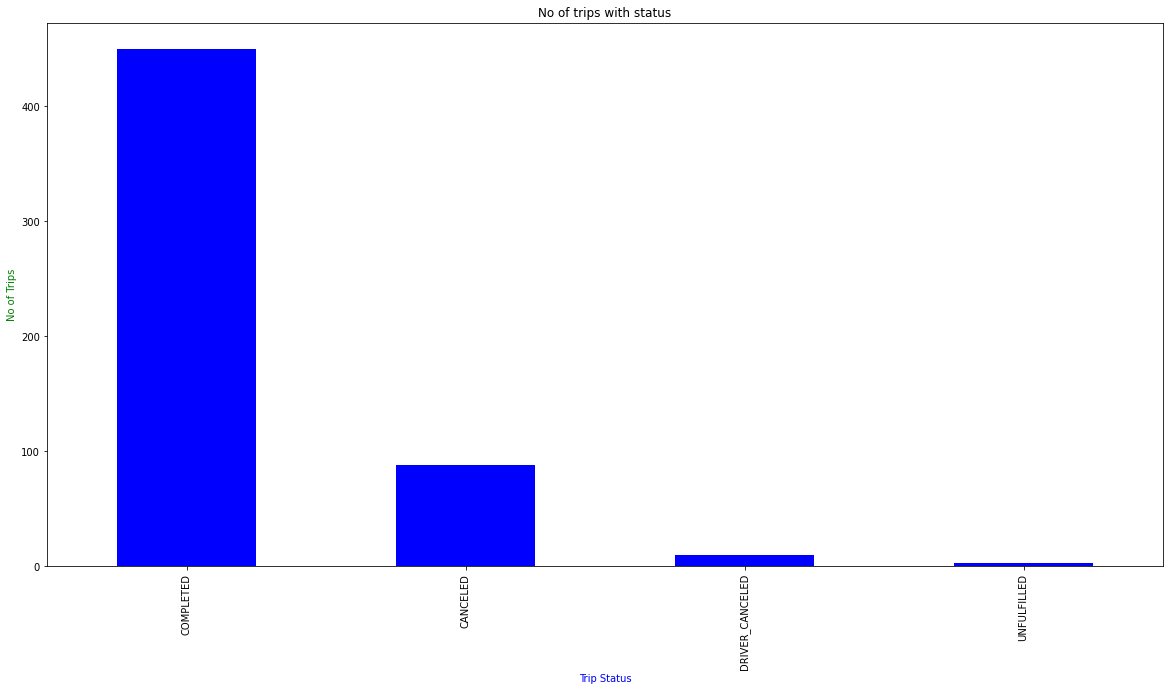

In [ ]:

#request status with no of trips
count = df['Trip or Order Status'].value_counts()
x = count.plot(kind='bar',figsize=(20,10), color="Blue")
plt.xlabel('Trip Status', color="Blue")
plt.ylabel('No of Trips', color="Green")
plt.title('No of trips with status')

In [ ]:

df.columns

Index(['City', 'Product Type', 'Trip or Order Status', 'Request Time',
       'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng', 'Dropoff Time',
       'Dropoff Lat', 'Dropoff Lng', 'Distance (miles)', 'Fare Amount', 'Date',
       'Time', 'Date_Time', 'month'],
      dtype='object')

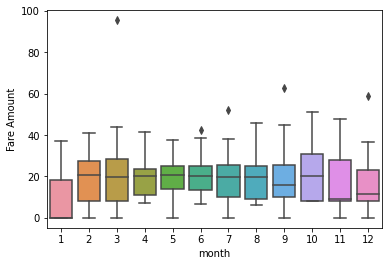

In [ ]:
sns.boxplot(x="month",y="Fare Amount",data=df)

In [ ]:
df.dtypes

City                             int64
Product Type                    object
Trip or Order Status            object
Request Time                    object
Begin Trip Time                 object
Begin Trip Lat                 float64
Begin Trip Lng                 float64
Dropoff Time                    object
Dropoff Lat                    float64
Dropoff Lng                    float64
Distance (miles)               float64
Fare Amount                    float64
Date                            object
Time                            object
Date_Time               datetime64[ns]
month                            int64
dtype: object

In [ ]:
df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Date,Time,Date_Time,month
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,2021-01-13,20:27:29,2021-01-13 20:27:29,1
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,2021-01-03,00:33:00,2021-01-03 00:33:00,1
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,2020-12-11,23:27:32,2020-12-11 23:27:32,12
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,2020-12-11,00:46:46,2020-12-11 00:46:46,12
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,2020-12-10,11:46:20,2020-12-10 11:46:20,12


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Product Type"] = le.fit_transform(df["Product Type"])

In [ ]:
df["Trip or Order Status"] = le.fit_transform(df["Trip or Order Status"])

In [ ]:
df.dtypes

City                             int64
Product Type                     int64
Trip or Order Status             int64
Request Time                    object
Begin Trip Time                 object
Begin Trip Lat                 float64
Begin Trip Lng                 float64
Dropoff Time                    object
Dropoff Lat                    float64
Dropoff Lng                    float64
Distance (miles)               float64
Fare Amount                    float64
Date                            object
Time                            object
Date_Time               datetime64[ns]
month                            int64
dtype: object

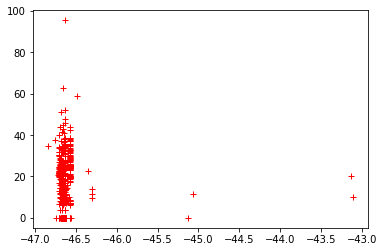

In [ ]:
plt.plot(df['Dropoff Lng'],df['Fare Amount'],'r+')

In [ ]:
print(np.where((df['Dropoff Lng']>-46.0)))

(array([358, 360, 537, 538]),)


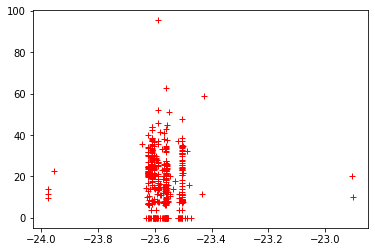

In [ ]:
plt.plot(df['Dropoff Lat'],df['Fare Amount'],'r+')

In [ ]:
print(np.where((df['Dropoff Lat']>-23.4)))

(array([537, 538]),)


In [ ]:
print(np.where((df['Dropoff Lat']<-23.7)))

(array([390, 402, 403, 404]),)


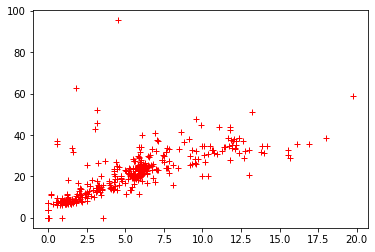

In [ ]:
plt.plot(df['Distance (miles)'],df['Fare Amount'],'r+')

In [ ]:
print(np.where((df['Fare Amount']> 45)))

In [ ]:
df["Product Type"].head()

1    8
2    8
3    8
4    8
5    8
Name: Product Type, dtype: int64

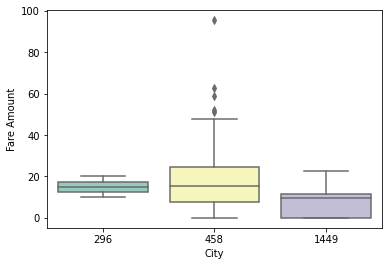

In [ ]:
sns.boxplot(x="City",y="Fare Amount",data=df,palette="Set3")

In [ ]:
print(np.where(df['Fare Amount']>50))

(array([  2,  96, 113, 181, 210]),)


Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

In [ ]:
z = np.abs(stats.zscore(df['Fare Amount']))
print(z)

[0.37520209 1.45185325 3.42799532 0.28753831 0.40660777 1.37052059
 1.3045992  0.37692371 1.3045992  1.3045992  0.70144908 0.70869654
 0.70869654 0.71594401 0.78761338 1.3045992  0.76023407 0.50404591
 1.3045992  0.41466051 0.33654894 0.58054692 0.4734455  0.33332785
 0.46056112 0.67154287 1.3045992  1.3045992  1.3045992  1.41239483
 1.3045992  1.3045992  0.26568484 1.43413722 0.35829134 1.09672747
 1.24248204 1.3045992  0.17952054 0.28984306 1.3045992  0.91554085
 0.633695   1.3045992  0.86883497 2.00749222 1.3045992  0.89379846
 1.91408045 1.3045992  1.13618589 1.13377007 1.3045992  0.68040088
 0.64185881 1.3045992  1.3045992  0.42754489 1.3045992  0.42512907
 0.51370919 0.51209864 0.313196   1.3045992  0.31158545 0.42512907
 0.51693029 0.57179998 0.32930148 0.37922846 0.73918588 0.85756113
 0.37037044 0.26901701 0.51140444 0.68362198 0.64266408 0.42271324
 0.83903984 1.58552871 0.44284509 1.3045992  1.3045992  0.88252462
 1.3045992  1.3045992  1.3045992  1.2529506  0.03951396 0.0667

In [ ]:
# Z Score Normalization
z = np.abs(stats.zscore(df['Fare Amount']))
threshold = 3
 
# Position of the outlier
outlier = np.where(z > threshold)
print(outlier)

(array([  2, 181, 210]),)


In [ ]:
df.shape

(551, 16)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [ ]:
# IQR
Q1 = np.percentile(df['Fare Amount'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Fare Amount'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

16.735

In [ ]:
upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

In [ ]:
# Above Upper bound
upper = df['Fare Amount'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df['Fare Amount'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound: 1      False
2      False
3       True
4      False
5      False
       ...  
549    False
550    False
551    False
552    False
553    False
Name: Fare Amount, Length: 551, dtype: bool
(array([  2,  96, 113, 181, 210]),)
Lower bound: 1      False
2      False
3      False
4      False
5      False
       ...  
549    False
550    False
551    False
552    False
553    False
Name: Fare Amount, Length: 551, dtype: bool
(array([], dtype=int64),)


In [ ]:
df.drop([3,98,115,184,213], axis=0, inplace=True)

In [ ]:
df.shape

(546, 16)

In [ ]:
df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Date,Time,Date_Time,month
1,458,8,1,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,2021-01-13,20:27:29,2021-01-13 20:27:29,1
2,458,8,1,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,2021-01-03,00:33:00,2021-01-03 00:33:00,1
4,458,8,1,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,2020-12-11,00:46:46,2020-12-11 00:46:46,12
5,458,8,1,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,2020-12-10,11:46:20,2020-12-10 11:46:20,12
7,458,7,1,2020-12-07 23:48:41 +0000 UTC,2020-12-07 23:57:30 +0000 UTC,-23.627161,-46.664190,2020-12-08 00:18:11 +0000 UTC,-23.559366,-46.666637,6.71,33.22,2020-12-07,23:57:30,2020-12-07 23:57:30,12


In [ ]:
pd.unique(df["City"]),pd.unique(df["Trip or Order Status"])

(array([ 458, 1449,  296]), array([1, 0, 2, 3]))

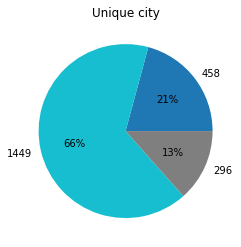

In [ ]:
x = pd.unique(df["City"])
labels = ['458','1449','296']
colors = ['tab:blue', 'tab:cyan', 'tab:gray']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Unique city')
plt.show()

In [ ]:
df.corr(method= "pearson")

,City,Product Type,Trip or Order Status,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,month
City,1.000000,0.148665,0.105019,-0.436053,0.231157,-0.415538,0.229809,-0.086688,-0.090487,0.022418
Product Type,0.148665,1.000000,0.197434,0.038252,0.118592,0.156612,0.085699,-0.143179,-0.026650,0.111524
Trip or Order Status,0.105019,0.197434,1.000000,0.023668,0.002095,-0.000870,0.009309,0.331780,0.422894,0.336494
Begin Trip Lat,-0.436053,0.038252,0.023668,1.000000,0.501481,0.828064,0.480301,-0.052677,-0.085201,0.012435
Begin Trip Lng,0.231157,0.118592,0.002095,0.501481,1.000000,0.516048,0.985719,-0.028444,-0.038505,0.076998
Dropoff Lat,-0.415538,0.156612,-0.000870,0.828064,0.516048,1.000000,0.482162,-0.160153,-0.167849,0.031867
Dropoff Lng,0.229809,0.085699,0.009309,0.480301,0.985719,0.482162,1.000000,0.002330,-0.009786,0.078381
Distance (miles),-0.086688,-0.143179,0.331780,-0.052677,-0.028444,-0.160153,0.002330,1.000000,0.875710,0.136153
Fare Amount,-0.090487,-0.026650,0.422894,-0.085201,-0.038505,-0.167849,-0.009786,0.875710,1.000000,0.224243
month,0.022418,0.111524,0.336494,0.012435,0.076998,0.031867,0.078381,0.136153,0.224243,1.000000


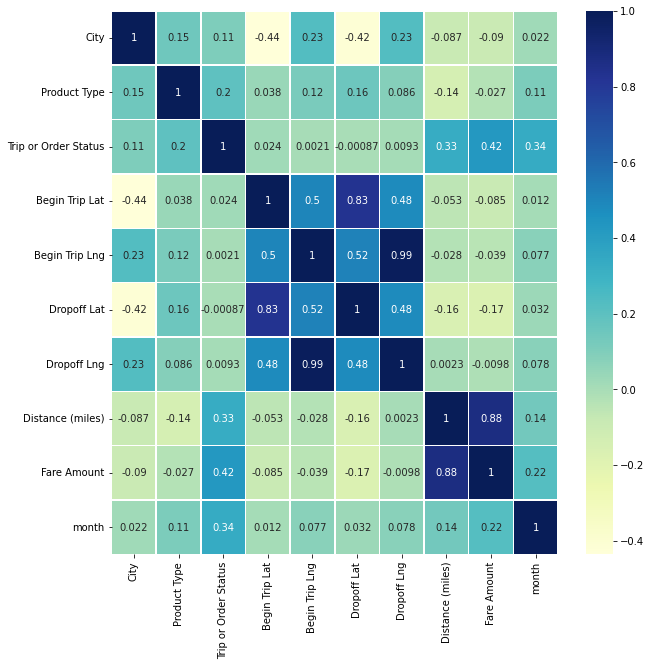

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)        # Sample figsize in inches


## Simple Linear Regression Model

In [ ]:
df_new = df[['Distance (miles)','Trip or Order Status', 'month']].copy()

In [ ]:
df_new.head()

,Distance (miles),Trip or Order Status,month
1,5.31,1,1
2,5.90,1,1
4,2.54,1,12
5,6.17,1,12
7,6.71,1,12


In [ ]:
y = df['Fare Amount']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
history = model.fit(df_new,y)

In [ ]:
history.score(df_new,y)

0.7908456577190438

#ANN Model for Prediction

1.   List item
2.   List item



In [ ]:
df_new.shape

(546, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_new)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y= y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
X_scaled.shape

(546, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.25)

In [ ]:
X_train.shape

(409, 3)

In [ ]:
y_test.shape

(137, 1)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 25)                100       
                                                                 
 dense_29 (Dense)            (None, 25)                650       
                                                                 
 dense_30 (Dense)            (None, 1)                 26        
                                                                 
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 13ms/step - loss: 0.2612 - val_loss: 0.1733
Epoch 2/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0954 - val_loss: 0.0567
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0298
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0300 - val_loss: 0.0229
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.0191
Epoch 6/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0166
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0151
Epoch 8/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0144
Epoch 9/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0142
Epoch 10/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0135
Epoch 11/20
14/14 

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


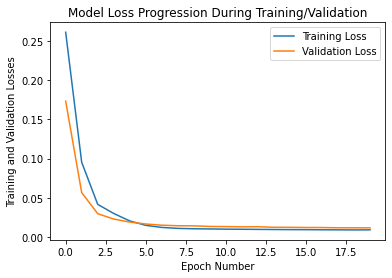

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])